In [14]:
import pandas as pd

df = pd.read_csv('cleaned_vers_data_covid19_vaccine_2020-2022_duplicate_removed.csv', nrows=100000, encoding='latin-1')


C:\Users\rutub\AppData\Local\Temp\ipykernel_17820\122521004.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_vers_data_covid19_vaccine_2020-2022_duplicate_removed.csv', nrows=100000, encoding='latin-1')


In [15]:
# Extract the specified columns
columns = ['VAERS_ID', 'AGE_YRS', 'SEX', 'DIED', 'L_THREAT', 'HOSPITAL', 'DISABLE', 'OFC_VISIT', 'ER_ED_VISIT', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'ALLERGIES', 'VAX_MANU', 'Symptoms']
df = df[columns]

# Display the extracted columns
df.head()

,VAERS_ID,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,DISABLE,OFC_VISIT,ER_ED_VISIT,OTHER_MEDS,CUR_ILL,HISTORY,ALLERGIES,VAX_MANU,Symptoms
0,902418,56.0,F,N,N,N,N,N,N,latex,none,none,none,PFIZER\BIONTECH,"Hypoaesthesia, Injection site hypoaesthesia"
1,902440,35.0,F,N,N,N,N,N,N,No medication,Not applicable,No concerns,N,PFIZER\BIONTECH,Headache
2,902446,55.0,F,N,N,N,N,N,N,"Novasc, Hydrochlorothiazide, synthroid, lisino...",none,"Hypertension, sleep apnea, hypothyroidism","Contrast Dye IV contrast, shellfish, strawberry",PFIZER\BIONTECH,"Erythema, Feeling hot, Flushing"
3,902464,42.0,M,N,N,N,N,N,Y,none,none,none,none,PFIZER\BIONTECH,"Dizziness, Electrocardiogram normal, Hyperhidr..."
4,902465,60.0,F,N,N,N,N,N,N,"Lisinopril, HCTZ, lipitor, amyitrypline, lexap...","Bronchitis, finished prednisone on 12-13-20","hypertension, fibromyalgia",Biaxin,PFIZER\BIONTECH,"Dysgeusia, Sensory disturbance, Oral pruritus,..."


In [16]:
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

df.loc[df['OTHER_MEDS'].str.startswith(('none', 'None', 'NONE', 'NOS', 'not', 'no', 'Not', 'na', 'NO', 'NOT', 'unknown', 'Unknown')), 'OTHER_MEDS'] = 'no medication'
df.loc[df['CUR_ILL'].str.startswith(('none', 'None', 'NONE', 'NOS', 'not', 'no', 'Not', 'na', 'NO', 'NOT', 'No', 'negative', 'non', 'Non', 'Nothing', 'nothing', 'unknown', 'Unknown')), 'CUR_ILL'] = 'not applicable'
df.loc[df['HISTORY'].str.startswith(('none', 'None', 'NONE', 'NOS', 'not', 'no', 'Not', 'na', 'NO', 'NOT', 'No', 'negative', 'non', 'Non', 'Nothing', 'nothing', 'unknown', 'Unknown')), 'HISTORY'] = 'no concerns'
df.loc[df['ALLERGIES'].str.startswith(('none', 'None', 'NONE', 'NOS', 'not', 'no', 'Not', 'na', 'NO', 'NOT', 'No', 'negative', 'non', 'Non', 'Nothing', 'nothing', 'nka', 'nkda', 'NKA', 'NKDA', 'unknown', 'Unknown', 'n')), 'ALLERGIES'] = 'no allergies'

## Defining dict for replacing values in four columns

In [17]:
med_replacement = {
    'vitamin d': 'vitamin',
    'multivitamin': 'vitamin',
    'levothyroxine': 'thyroid med',
    'lisinopril': 'BP Meds',
    'calcium': 'supplement',
    'metformin': 'diabetes med',
    'vitamin c': 'vitamin',
    'atorvastatin': 'cholesterol med',
    'fish oil': 'supplement',
    'zyrtec': 'antihistamine',
    'synthroid': 'thyroid med',
    'magnesium': 'supplement',
    'omeprazole': 'acid reflux med',
    'losartan': 'BP Meds',
    'zinc': 'supplement',
    'metoprolol': 'BP Meds',
    'tylenol': 'pain reliever',
    'gabapentin': 'neuropathic pain med',
    'amlodipine': 'BP Meds',
    'aspirin': 'blood thinner',
    'probiotic': 'supplement',
    'ibuprofen': 'pain reliever',
    'biotin': 'supplement',
    'flonase': 'nasal spray',
    'lexapro': 'antidepressant',
    'wellbutrin': 'antidepressant',
    'melatonin': 'sleep aid',
    'sertraline': 'antidepressant',
    'zoloft': 'antidepressant',
    'b12': 'vitamin',
    'simvastatin': 'cholesterol med',
    'claritin': 'antihistamine',
    'lipitor': 'cholesterol med',
    'birth control': 'contraceptive',
    'albuterol': 'asthma med',
    'hydrochlorothiazide': 'BP Meds',
    'singulair': 'asthma med',
    'coq10': 'supplement',
    'baby aspirin': 'blood thinner',
    'iron': 'supplement',
    'montelukast': 'asthma med',
    'rosuvastatin': 'cholesterol med',
    'atenolol': 'BP Meds',
    'folic acid': 'vitamin',
    'turmeric': 'supplement',
    'eliquis': 'blood thinner',
    'famotidine': 'acid reflux med',
    'crestor': 'cholesterol med',
    'c': 'vitamin',
    'd': 'vitamin',
    'vitamin b12': 'vitamin',
    'adderall': 'ADHD med',
    'bupropion': 'antidepressant',
    'potassium': 'supplement',
    'pravastatin': 'cholesterol med',
    'cymbalta': 'antidepressant',
    'hctz': 'BP Meds',
    'c': 'vitamin',
    'meloxicam': 'pain reliever',
    'fluoxetine': 'antidepressant',
    'trazodone': 'antidepressant',
    'probiotics': 'supplement',
    'nexium': 'acid reflux med',
    'protonix': 'acid reflux med',
    'estradiol': 'hormone',
    'citalopram': 'antidepressant',
    'carvedilol': 'BP Meds',
    'escitalopram': 'antidepressant',
    'pepcid': 'acid reflux med',
    'benadryl': 'antihistamine',
    'duloxetine': 'antidepressant',
    'vitamins': 'vitamin',
    'furosemide': 'diuretic',
    'multivitamins': 'vitamin',
    'trazadone': 'antidepressant',
    'loratadine': 'antihistamine',
    'allopurinol': 'gout med',
    'singular': 'asthma med',
    'vit d3': 'vitamin',
    'b complex': 'vitamin',
    'prenatal vitamin': 'vitamin',
    'tramadol': 'pain reliever',
    'xanax': 'anxiety med',
    'prednisone': 'steroid',
    'tamsulosin': 'prostate med',
    'symbicort': 'asthma med',
    'omega 3': 'supplement',
    'glucosamine': 'supplement',
    'advair': 'asthma med',
    'cetirizine': 'antihistamine',
    'asa': 'blood thinner',
    'progesterone': 'hormone',
    'acetaminophen': 'pain reliever',
    'propranolol': 'BP med',
    'levothyroxin': 'thyroid med',
    'vitamin e': 'vitamin',
    'lamictal': 'anticonvulsant',
    'lasix': 'diuretic',
    'effexor': 'antidepressant',
    'celexa': 'antidepressant',
    'low dose aspirin': 'blood thinner',
    'mvi': 'vitamin',
    'glipizide': 'diabetes med',
    'advil': 'pain reliever',
    'prenatal vitamins': 'vitamin',
    'buspirone': 'anxiety med',
    'venlafaxine': 'antidepressant',
    'tumeric': 'supplement',
    'clonazepam': 'anxiety med',
    'insulin': 'diabetes med',
    'aspirin 81mg': 'blood thinner',
    'xyzal': 'antihistamine',
    'finasteride': 'prostate med',
    'vitamin b complex': 'vitamin',
    'ambien': 'sleep aid',
    'xarelto': 'blood thinner',
    'lamotrigine': 'anticonvulsant',
    'plavix': 'blood thinner',
    'celebrex': 'pain reliever',
    'buspar': 'anxiety med',
    'b-12': 'vitamin',
    'warfarin': 'blood thinner',
    'lorazepam': 'anxiety med',
    'vitamin b': 'vitamin',
    'topamax': 'anticonvulsant',
    'fluticasone': 'nasal spray',
    'amitriptyline': 'antidepressant',
    'daily vitamin': 'vitamin',
    'elderberry': 'supplement',
    'n/a': 'unknown',
    'diltiazem': 'BP/heart med',
    'vyvanse': 'ADHD med',
    'fenofibrate': 'cholesterol med',
    'centrum silver': 'vitamin',
    'alprazolam': 'anxiety med',
    'armour thyroid': 'thyroid med',
    'albuterol inhaler': 'asthma med',
    'miralax': 'digestive med',
    'methotrexate': 'immunosuppressant',
    'valsartan': 'BP Meds',
    'lantus': 'diabetes med',
    'jardiance': 'diabetes med',
    'baclofen': 'muscle relaxer',
    'aleve': 'pain reliever',
    'lyrica': 'neuropathic pain med',
    'hydroxyzine': 'anxiety med',
    'topiramate': 'anticonvulsant',
    'acyclovir': 'antiviral',
    'collagen': 'supplement',
    'colace': 'stool softener',
    'trulicity': 'diabetes med',
    'norvasc': 'BP Meds',
    'clopidogrel': 'blood thinner',
    'losartin': 'BP Meds',
    'zetia': 'cholesterol med',
    'paxil': 'antidepressant',
    'krill oil': 'supplement',
    'e': 'vitamin',
    'potassium chloride': 'supplement',
    'daily multivitamin': 'vitamin',
    'seroquel': 'antipsychotic',
    'zolpidem': 'sleep aid',
    'chlorthalidone': 'BP Meds',
    'verapamil': 'BP/heart med',
    'flomax': 'prostate med',
    'clonidine': 'BP Meds',
    'aspirin 81 mg': 'blood thinner',
    'cyclobenzaprine': 'muscle relaxer',
    'plaquenil': 'antimalarial',
    'bystolic': 'BP Meds',
    'januvia': 'diabetes med',
    'hydroxychloroquine': 'antimalarial',
    'ferrous sulfate': 'iron supplement',
    'multi vitamins': 'vitamin',
    'klonopin': 'anxiety med',
    'doxycycline': 'antibiotic',
    'lovastatin': 'cholesterol med',
    'humalog': 'diabetes med',
    'tizanidine': 'muscle relaxer',
    'motrin': 'pain reliever',
    'mirena iud': 'contraceptive',
    'coreg': 'BP/heart med',
    'lutein': 'vitamin',
    'zofran': 'antiemetic',
    'vitamin b-12': 'vitamin',
    'oxycodone': 'pain reliever',
    'birth control pill': 'contraceptive',
    'vit b12': 'vitamin',
    'ativan': 'anxiety med',
    'ozempic': 'diabetes med',
    'b-complex': 'vitamin',
    'valtrex': 'antiviral',
    'naproxen': 'pain reliever',
    'liothyronine': 'thyroid med',
    'ezetimibe': 'cholesterol med',
    'mirtazapine': 'antidepressant',
    'diclofenac': 'pain reliever',
    'flovent': 'asthma/COPD med',
    'cranberry': 'supplement',
    'calcium citrate': 'supplement',
    'keppra': 'anticonvulsant',
    'oxybutynin': 'bladder med',
    'multiple vitamin': 'vitamin',
    'cholecalciferol': 'vitamin',
    'neurontin': 'neuropathic pain med',
    'glimepiride': 'diabetes med',
    'valacyclovir': 'antiviral',
    'estrogen': 'hormone',
    'amlodipine besylate': 'BP Meds',
    'prevacid': 'acid reflux med',
    '81 mg aspirin': 'blood thinner',
    'metoprolol tartrate': 'BP Meds',
    'nuvaring': 'contraceptive',
    'abilify': 'antipsychotic',
    'fiber': 'supplement',
    'prenatal': 'vitamin',
    'niacin': 'vitamin',
    'hydralazine': 'BP Meds',
    'spiriva': 'asthma/COPD med',
    'hydrocodone': 'pain reliever',
    'phentermine': 'weight loss med',
    'b': 'vitamin',
    'dexilant': 'acid reflux med',
    'humira': 'immunosuppressant',
    'milk thistle': 'supplement',
    'statin': 'cholesterol med',
    'iron supplement': 'iron supplement',
    'paroxetine': 'antidepressant',
    'flexeril': 'muscle relaxer',
    'vit. d': 'vitamin',
    'glucosamine chondroitin': 'supplement',
    'premarin': 'hormone',
    'buproprion': 'antidepressant',
    'metropolol': 'BP Meds',
    'pristiq': 'antidepressant',
    'trintellix': 'antidepressant',
    'linzess': 'digestive med',
    'tamoxifen': 'cancer med',
    'sprintec': 'contraceptive',
    'restasis': 'eye med',
    'nifedipine': 'BP Meds',
    'flaxseed oil': 'supplement',
    'levoxyl': 'thyroid med',
    'senna': 'stool softener',
    'azelastine': 'nasal spray',
    'omega-3': 'supplement',
    'magnesium oxide': 'supplement',
    'lysine': 'supplement',
    'multi-vitamins': 'vitamin'    
}

symptom_categories = {
    'headache': 'pain',
    'pyrexia': 'fever',
    'fatigue': 'discomfort',
    'chills': 'fever',
    'pain': 'pain',
    'dizziness': 'disorientation',
    'nausea': 'discomfort',
    'pain in extremity': 'pain',
    'injection site pain': 'pain',
    'arthralgia': 'pain',
    'myalgia': 'pain',
    'dyspnoea': 'breathing difficulty',
    'rash': 'skin condition',
    'injection site erythema': 'skin reaction',
    'pruritus': 'itching',
    'injection site swelling': 'skin reaction',
    'vomiting': 'discomfort',
    'asthenia': 'weakness',
    'hyperhidrosis': 'excessive sweating',
    'injection site pruritus': 'skin reaction',
    'erythema': 'skin condition',
    'paraesthesia': 'abnormal sensation',
    'diarrhoea': 'digestive issue',
    'hypoaesthesia': 'sensory issue',
    'urticaria': 'skin condition',
    'chest pain': 'pain',
    'feeling abnormal': 'discomfort',
    'lymphadenopathy': 'enlarged lymph nodes',
    'cough': 'respiratory issue',
    'malaise': 'discomfort',
    'injection site warmth': 'skin reaction',
    'peripheral swelling': 'swelling',
    'syncope': 'fainting',
    'chest discomfort': 'pain',
    'blood test': 'medical test',
    'tremor': 'shaking',
    'palpitations': 'heart issue',
    'tinnitus': 'sensory issue',
    'injection site rash': 'skin reaction',
    'heart rate increased': 'heart issue',
    'back pain': 'pain',
    'condition aggravated': 'worsened condition',
    'electrocardiogram': 'heart test',
    'feeling hot': 'temperature sensitivity',
    'decreased appetite': 'appetite issue',
    'rash erythematous': 'skin condition',
    'loss of consciousness': 'fainting',
    'swelling': 'swelling',
    'neck pain': 'pain',
    'skin warm': 'temperature sensitivity',
    'oropharyngeal pain': 'throat pain',
    'mobility decreased': 'movement issue',
    'rash pruritic': 'itching',
    'flushing': 'skin redness',
    'sleep disorder': 'sleep issue',
    'migraine': 'pain',
    'laboratory test': 'medical test',
    'computerised tomogram': 'medical imaging',
    'death': 'severe outcome',
    'muscle spasms': 'muscle issue',
    'vertigo': 'dizziness',
    'full blood count': 'blood test',
    'fall': 'accident',
    'anxiety': 'mental health',
    'inappropriate schedule of product administration': 'administration issue',
    'body temperature increased': 'temperature change',
    'muscular weakness': 'weakness',
    'lethargy': 'fatigue',
    'insomnia': 'sleep issue',
    'vaccination site pain': 'pain',
    'chest x-ray': 'medical imaging',
    'abdominal pain upper': 'abdominal pain',
    'abdominal pain': 'abdominal pain',
    'impaired work ability': 'work-related issue',
    'swelling face': 'facial swelling',
    'feeling cold': 'temperature sensitivity',
    'vision blurred': 'vision issue',
    'burning sensation': 'sensory issue',
    'metabolic function test': 'medical test',
    'immediate post-injection reaction': 'reaction',
    'herpes zoster': 'viral infection',
    'musculoskeletal stiffness': 'muscle issue',
    'pallor': 'skin color issue',
    'throat tightness': 'throat issue',
    'paraesthesia oral': 'sensory issue',
    'hypertension': 'blood pressure issue',
    'extra dose administered': 'administration issue',
    'rhinorrhoea': 'nasal issue',
    'blood pressure increased': 'blood pressure issue',
    'incorrect dose administered': 'administration issue',
    'tachycardia': 'heart issue',
    'magnetic resonance imaging': 'medical imaging',
    'injection site induration': 'skin reaction',
    'confusional state': 'mental confusion',
    'interchange of vaccine products': 'administration issue',
    'somnolence': 'drowsiness',
    'throat irritation': 'throat issue',
    'axillary pain': 'pain',
    'blood test normal': 'medical test',
    'unresponsive to stimuli': 'unresponsiveness',
    'echocardiogram': 'heart test',
    'abdominal discomfort': 'abdominal issue',
    'loss of personal independence in daily activities': 'functionality loss',
    'tenderness': 'sensitivity',
    'lip swelling': 'facial swelling',
    'injection site reaction': 'skin reaction',
    'lymph node pain': 'pain',
    'dysphagia': 'swallowing issue',
    'seizure': 'neurological issue',
    'nasal congestion': 'nasal issue',
    'hypoaesthesia oral': 'sensory issue',
    'heavy menstrual bleeding': 'menstrual issue',
    'ageusia': 'taste issue',
}

allergies_categories = {
    'penicillin': 'Medication Allergies',
    'sulfa': 'Medication Allergies',
    'latex': 'Environmental/Seasonal Allergies',
    'codeine': 'Medication Allergies',
    'amoxicillin': 'Medication Allergies',
    'sulfa drugs': 'Medication Allergies',
    'shellfish': 'Food Allergies',
    'pcn': 'Medication Allergies',
    'morphine': 'Medication Allergies',
    'erythromycin': 'Medication Allergies',
    'bactrim': 'Medication Allergies',
    'aspirin': 'Medication Allergies',
    'cipro': 'Medication Allergies',
    'iodine': 'Medication Allergies',
    'keflex': 'Medication Allergies',
    'dust': 'Environmental/Seasonal Allergies',
    'gluten': 'Food Allergies',
    'seasonal allergies': 'Environmental/Seasonal Allergies',
    'mold': 'Environmental/Seasonal Allergies',
    'augmentin': 'Medication Allergies',
    'levaquin': 'Medication Allergies',
    'pollen': 'Environmental/Seasonal Allergies',
    'lisinopril': 'Medication Allergies',
    'cats': 'Other/Specific Allergies',
    'peanuts': 'Food Allergies',
    'tetracycline': 'Medication Allergies',
    'doxycycline': 'Medication Allergies',
    'demerol': 'Medication Allergies',
    'ibuprofen': 'Medication Allergies',
    'clindamycin': 'Medication Allergies',
    'penicillins': 'Medication Allergies',
    'bee stings': 'Insect Allergies',
    'dairy': 'Food Allergies',
    'eggs': 'Food Allergies',
    'ceclor': 'Medication Allergies',
    'hydrocodone': 'Medication Allergies',
    'percocet': 'Medication Allergies',
    'tramadol': 'Medication Allergies',
    'vicodin': 'Medication Allergies',
    'shrimp': 'Food Allergies',
    'sulfur': 'Other/Specific Allergies',
    'compazine': 'Medication Allergies',
    'tree nuts': 'Food Allergies',
    'grass': 'Environmental/Seasonal Allergies',
    'soy': 'Food Allergies',
    'bees': 'Insect Allergies',
    'wheat': 'Food Allergies',
    'sulfa antibiotics': 'Medication Allergies',
    'azithromycin': 'Medication Allergies',
    'macrobid': 'Medication Allergies',
    'kiwi': 'Food Allergies',
    'seasonal': 'Environmental/Seasonal Allergies',
    'pineapple': 'Food Allergies',
    'biaxin': 'Medication Allergies',
    'cephalosporins': 'Medication Allergies',
    'prednisone': 'Medication Allergies',
    'sulpha': 'Medication Allergies',
    'oxycodone': 'Medication Allergies',
    'strawberries': 'Food Allergies',
    'trees': 'Environmental/Seasonal Allergies',
    'zithromax': 'Medication Allergies',
    'codine': 'Medication Allergies',
    'bananas': 'Food Allergies',
    'vancomycin': 'Medication Allergies',
    'seafood': 'Food Allergies',
    'cephalexin': 'Medication Allergies',
    'nsaids': 'Medication Allergies',
    'dilaudid': 'Medication Allergies',
    'dust mites': 'Environmental/Seasonal Allergies',
    'ciprofloxacin': 'Medication Allergies',
    'contrast dye': 'Medication Allergies',
    'walnuts': 'Food Allergies',
    'milk': 'Food Allergies',
    'benadryl': 'Other/Specific Allergies',
    'statins': 'Other/Specific Allergies',
    'dogs': 'Other/Specific Allergies',
    'nickel': 'Other/Specific Allergies',
    'reglan': 'Other/Specific Allergies',
    'flagyl': 'Medication Allergies',
    'adhesive': 'Other/Specific Allergies',
    'gabapentin': 'Other/Specific Allergies',
    'mango': 'Food Allergies',
    'fish': 'Food Allergies',
    'shell fish': 'Food Allergies',
    'lactose intolerant': 'Other/Specific Allergies',
    'corn': 'Food Allergies',
    'lactose': 'Food Allergies',
    'ampicillin': 'Medication Allergies',
    'codiene': 'Medication Allergies',
    'avocado': 'Food Allergies',
    'nuts': 'Food Allergies',
    'almonds': 'Food Allergies',
    'celebrex': 'Other/Specific Allergies',
    'mushrooms': 'Food Allergies',
    'phenergan': 'Medication Allergies',
    'adhesive tape': 'Other/Specific Allergies',
    'adhesives': 'Other/Specific Allergies',
    'ace inhibitors': 'Other/Specific Allergies',
    'coconut': 'Food Allergies',
    'tylenol': 'Other/Specific Allergies',
    'septra': 'Other/Specific Allergies',
    'tomatoes': 'Food Allergies',
    'bee venom': 'Insect Allergies',
    'metformin': 'Other/Specific Allergies',
    'chocolate': 'Food Allergies',
    'penecillin': 'Medication Allergies',
    'ragweed': 'Environmental/Seasonal Allergies',
    'lidocaine': 'Medication Allergies',
    'ceftin': 'Medication Allergies'
}

historical_problems = {
    'asthma': 'Respiratory Conditions',
    'hypertension': 'Cardiovascular Health',
    'high blood pressure': 'Cardiovascular Health',
    'htn': 'Cardiovascular Health',
    'hypothyroidism': 'Endocrine Disorders',
    'diabetes': 'Endocrine Disorders',
    'anxiety': 'Mental Health',
    'depression': 'Mental Health',
    'gerd': 'Gastrointestinal Disorders',
    'obesity': 'Other Conditions',
    'high cholesterol': 'Endocrine Disorders',
    'hyperlipidemia': 'Endocrine Disorders',
    'arthritis': 'Autoimmune Disorders',
    'migraines': 'Neurological Disorders',
    'fibromyalgia': 'Autoimmune Disorders',
    'copd': 'Respiratory Conditions',
    'hypothyroid': 'Endocrine Disorders',
    'osteoporosis': 'Other Conditions',
    'seasonal allergies': 'Respiratory Conditions',
    'ibs': 'Gastrointestinal Disorders',
    'osteoarthritis': 'Autoimmune Disorders',
    'allergies': 'Other Conditions',
    'sleep apnea': 'Respiratory Conditions',
    'type 2 diabetes': 'Endocrine Disorders',
    'rheumatoid arthritis': 'Autoimmune Disorders',
    'pcos': 'Endocrine Disorders',
    'migraine': 'Neurological Disorders',
    'anemia': 'Other Conditions',
    'hbp': 'Cardiovascular Health',
    'adhd': 'Mental Health',
    'acid reflux': 'Gastrointestinal Disorders',
    'psoriasis': 'Autoimmune Disorders',
    'heart disease': 'Cardiovascular Health',
    'cad': 'Cardiovascular Health',
    'diabetic': 'Endocrine Disorders',
    'lupus': 'Autoimmune Disorders',
    'gout': 'Other Conditions',
    'afib': 'Cardiovascular Health',
    'glaucoma': 'Other Conditions',
    'insomnia': 'Other Conditions',
    'thyroid': 'Endocrine Disorders',
    'endometriosis': 'Other Conditions',
    'eczema': 'Autoimmune Disorders',
    'dm': 'Endocrine Disorders',
    'ptsd': 'Mental Health',
    'allergic rhinitis': 'Autoimmune Disorders',
    'atrial fibrillation': 'Cardiovascular Health',
    'osteopenia': 'Other Conditions',
    'chf': 'Cardiovascular Health',
    'overweight': 'Other Conditions',
    'hypercholesterolemia': 'Endocrine Disorders',
    'diabetes type 2': 'Endocrine Disorders',
    'epilepsy': 'Neurological Disorders',
    'hld': 'Endocrine Disorders',
    'bph': 'Other Conditions',
    'dementia': 'Mental Health',
    'high bp': 'Cardiovascular Health',
    'celiac disease': 'Gastrointestinal Disorders',
    'ulcerative colitis': 'Gastrointestinal Disorders',
    'neuropathy': 'Neurological Disorders',
    'multiple sclerosis': 'Neurological Disorders',
    'back pain': 'Other Conditions',
    'chronic pain': 'Other Conditions',
    'mild asthma': 'Respiratory Conditions',
    'cholesterol': 'Endocrine Disorders',
    'psoriatic arthritis': 'Autoimmune Disorders',
    'ra': 'Autoimmune Disorders',
    'vitamin d deficiency': 'Endocrine Disorders',
    'a-fib': 'Cardiovascular Health',
    'ckd': 'Other Conditions',
    'coronary artery disease': 'Cardiovascular Health',
    'type 1 diabetes': 'Endocrine Disorders',
    'osa': 'Respiratory Conditions',
    'chronic kidney disease': 'Other Conditions',
    'hashimotos': 'Endocrine Disorders',
    'obese': 'Other Conditions',
    'denies': 'Other Conditions',
    'pre-diabetes': 'Endocrine Disorders',
    'blood pressure': 'Cardiovascular Health',
    'mitral valve prolapse': 'Cardiovascular Health',
    'scoliosis': 'Other Conditions',
    'spinal stenosis': 'Other Conditions',
    'kidney stones': 'Other Conditions',
    'prediabetes': 'Endocrine Disorders',
    'reflux': 'Gastrointestinal Disorders',
    'environmental allergies': 'Autoimmune Disorders',
    'kidney disease': 'Other Conditions',
    'breast cancer': 'Cancer',
    'tachycardia': 'Cardiovascular Health',
    'irritable bowel syndrome': 'Gastrointestinal Disorders',
    'morbid obesity': 'Other Conditions',
    'dyslipidemia': 'Endocrine Disorders',
    'bipolar disorder': 'Mental Health',
    'chronic back pain': 'Other Conditions',
    'seizure disorder': 'Neurological Disorders',
    'vertigo': 'Other Conditions',
    'diverticulitis': 'Gastrointestinal Disorders',
    'chronic migraines': 'Neurological Disorders',
    'thyroid disease': 'Endocrine Disorders',
    'essential hypertension': 'Cardiovascular Health',
    'diverticulosis': 'Gastrointestinal Disorders',
    'ms': 'Neurological Disorders',
    'migraine headaches': 'Neurological Disorders',
    'congestive heart failure': 'Cardiovascular Health',
    'low thyroid': 'Endocrine Disorders',
    'crohn\'s disease': 'Gastrointestinal Disorders',
    'obstructive sleep apnea': 'Respiratory Conditions',
    'pacemaker': 'Cardiovascular Health',
    'dm2': 'Endocrine Disorders',
    'graves disease': 'Endocrine Disorders',
    'type ii diabetes': 'Endocrine Disorders',
    'add': 'Mental Health',
    'seizures': 'Neurological Disorders',
    'fatty liver': 'Other Conditions',
    'pre-diabetic': 'Endocrine Disorders',
    'heart failure': 'Cardiovascular Health',
    'medical history/concurrent conditions: no adverse event (no reported medical history.)': 'Other Conditions',
    'heart murmur': 'Cardiovascular Health',
    'major depressive disorder': 'Mental Health',
    'sinusitis': 'Other Conditions',
    'anxiety/depression': 'Mental Health',
    'hiatal hernia': 'Gastrointestinal Disorders',
    'svt': 'Cardiovascular Health',
    'hashimoto\'s thyroiditis': 'Endocrine Disorders',
    'depression/anxiety': 'Mental Health',
    'hyperthyroidism': 'Endocrine Disorders',
    'unspecified': 'Other Conditions',
    'hiv': 'Other Conditions',
    'degenerative disc disease': 'Other Conditions',
    'constipation': 'Gastrointestinal Disorders',
    'peripheral neuropathy': 'Neurological Disorders',
    'celiac': 'Gastrointestinal Disorders',
    'gastritis': 'Gastrointestinal Disorders',
    'high blood pressure.': 'Cardiovascular Health',
    'anxiety disorder': 'Mental Health',
    'chronic sinusitis': 'Other Conditions',
    'rosacea': 'Other Conditions',
    'elevated cholesterol': 'Endocrine Disorders',
    'same as above': 'Other Conditions',
    'generalized anxiety disorder': 'Mental Health',
    'restless leg syndrome': 'Neurological Disorders',
    'emphysema': 'Respiratory Conditions',
    'interstitial cystitis': 'Other Conditions',
    'chronic bronchitis': 'Respiratory Conditions',
    'cancer': 'Cancer',
    'heart': 'Cardiovascular Health',
    'prostate cancer': 'Cancer',
    'pots': 'Other Conditions'
}

In [18]:
from apyori import apriori

def process_meds(row):
    apriori_set = set()  # Use a set instead of a list
    
    for med, replacement in med_replacement.items():
        if med in row['OTHER_MEDS']:
            apriori_set.add(replacement)
    
    for allergy, replacement in allergies_categories.items():
        if allergy in row['ALLERGIES']:
            apriori_set.add(replacement)
    
    if row['VAX_MANU'] == 'janssen':
        apriori_set.add('Janssen vaccine')
    
    if row['VAX_MANU'] == 'pfizer\\biontech':
        apriori_set.add('Pfizer vaccine')
    
    if row['VAX_MANU'] == 'moderna':
        apriori_set.add('Moderna vaccine')

    for condition, replacement in historical_problems.items():
        if condition in row['HISTORY']:
            apriori_set.add(replacement)
        
    if 'y' in str(row['OFC_VISIT']) or 'y' in str(row['ER_ED_VISIT']) or 'y' in str(row['HOSPITAL']) or 'y' in str(row['DIED']):
        apriori_set.add('Sought medical care')  # Corrected spelling of 'Sought'

    apriori_list = list(apriori_set)  # Convert set to list before returning
    
    if not apriori_list:
        apriori_list = ['ignore']
    
    return apriori_list

# Assuming df is defined somewhere before this code block
df['APRIORI_LIST'] = df.apply(process_meds, axis=1)

In [19]:
transactions = df.groupby('VAERS_ID')['APRIORI_LIST'].apply(lambda x: [item for sublist in x for item in sublist]).tolist()

results = list(apriori(transactions, min_support=0.1, min_confidence=0.1, min_length=2, max_length=6))

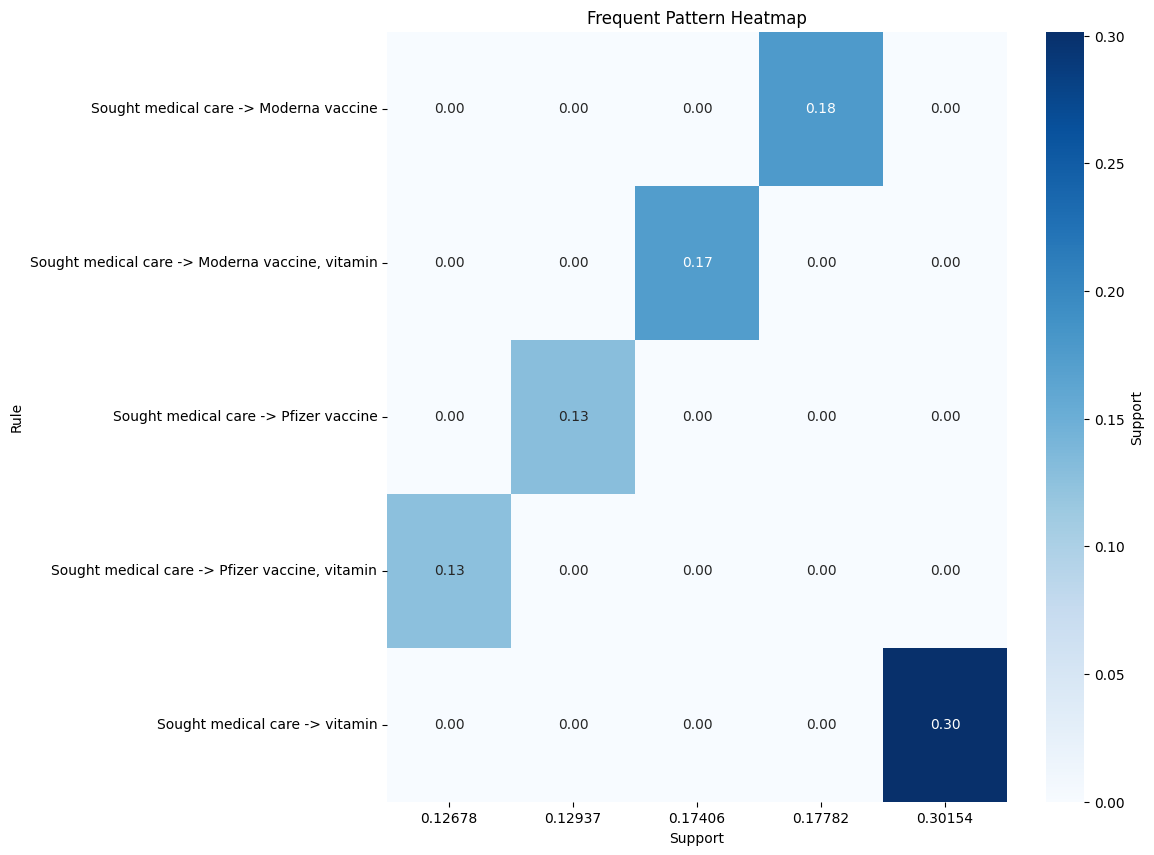

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def extract_rules(apriori_result):
    rules = []
    supports = []
    for relation_record in apriori_result:
        for ordered_statistic in relation_record.ordered_statistics:
            antecedent = list(ordered_statistic.items_base)
            consequent = list(ordered_statistic.items_add)
            support = relation_record.support

            if 'Sought medical care' in antecedent and len(antecedent) == 1:
                if antecedent and consequent:  
                    rule = ', '.join(antecedent) + ' -> ' + ', '.join(consequent)
                    rules.append(rule)
                    supports.append(support)
    return rules, supports

extracted_rules, support_values = extract_rules(results)

rules_df = pd.DataFrame({'Rules': extracted_rules, 'Support': support_values})

# Pivot the DataFrame for heatmap visualization
pivot_df = rules_df.pivot(index='Rules', columns='Support', values='Support').fillna(0)

plt.figure(figsize=(10, 10))
sns.heatmap(pivot_df, cmap='Blues', annot=True, fmt='.2f', cbar_kws={'label': 'Support'})
plt.title('Frequent Pattern Heatmap')
plt.xlabel('Support')
plt.ylabel('Rule')
plt.show()
